# Model Metrics Lab
### Mason Nicoletti

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, log_loss, RocCurveDisplay, roc_auc_score

In [47]:
# Part 1

'''
Using the [mushroom dataset](https://archive.ics.uci.edu/static/public/848/secondary+mushroom+dataset.zip), 
Define a question that can be answered using classification, specifically kNN.
'''

shroom = pd.read_csv("../data/secondary_data_mushrooms.csv", sep=';')

shroom.head()
shroom.info()
shroom['does-bruise-or-bleed'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

does-bruise-or-bleed
f    50479
t    10590
Name: count, dtype: int64

Part 1

Question: Can we use a KNN model to predict whether a species of mushrooms bruises or bleeds based on other features in this dataset.

/home/vscode/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


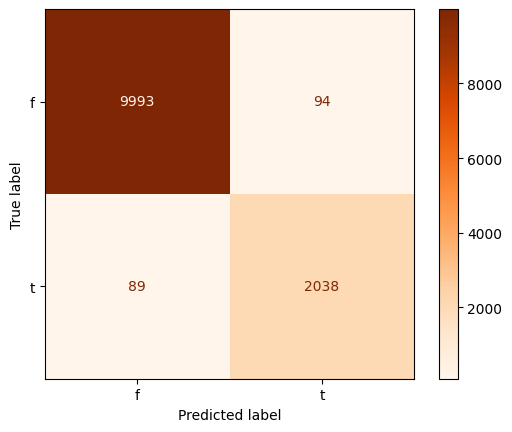

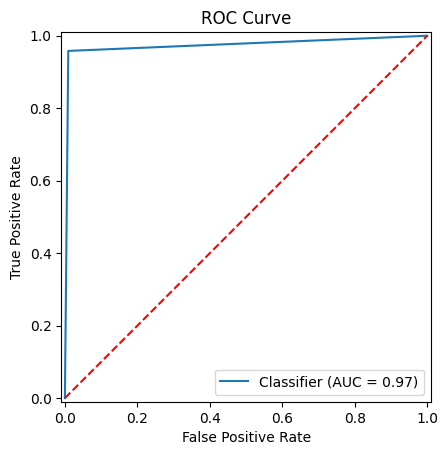

In [48]:
# Part 2

# Select Variables
x = shroom[['class', 'cap-diameter', 'cap-shape', 'cap-color', 'stem-height', 'stem-width', 'has-ring', 'habitat']]
y = shroom[['does-bruise-or-bleed']]

# One-Hot Encoding
object_col = x.select_dtypes('object').columns
x = pd.get_dummies(x, columns=object_col, drop_first=True)

# Partition Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Standardize Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Perform KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Performance Metrics
accuracy = knn.score(x_test, y_test)
recall = recall_score(y_test, y_pred, pos_label='t')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cm_display.plot(cmap='Oranges')

# Rates
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# F1 Score
f1score = f1_score(y_test, y_pred, pos_label='t')

# Cross Entropy
y_test_encoded = y_test['does-bruise-or-bleed'].apply(lambda x: 1 if x == 't' else 0)
y_pred_encoded = pd.Series(y_pred).apply(lambda x: 1 if x == 't' else 0)

cross_entropy = log_loss(y_test_encoded, y_pred_encoded)

# ROC Curve and AUC
AUC = roc_auc_score(y_test_encoded, y_pred_encoded)

roc_plot = RocCurveDisplay.from_predictions(y_test_encoded, y_pred_encoded)
plt.plot([0,1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

